In [2]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [3]:
t, g = smp.symbols('t g')
m1, m2 = smp.symbols('m1 m2')
L1, L2 = smp.symbols('L1, L2')

the1, the2 = smp.symbols(r'\theta_1, \theta_2', cls=smp.Function)
the1 = the1(t)
the2 = the2(t)

In [4]:
the1_d = smp.diff(the1, t)
the2_d = smp.diff(the2, t)
the1_dd = smp.diff(the1_d, t)
the2_dd = smp.diff(the2_d, t)

In [5]:
#cartesian
x1 = L1*smp.sin(the1)
y1 = -L1*smp.cos(the1)
x2 = L1*smp.sin(the1)+L2*smp.sin(the2)
y2 = -L1*smp.cos(the1)-L2*smp.cos(the2)

def get_x1y1x2y2(t, the1, the2, L1, L2):
    return (L1*np.sin(the1),
            -L1*np.cos(the1),
            L1*np.sin(the1) + L2*np.sin(the2),
            -L1*np.cos(the1) - L2*np.cos(the2))

In [6]:
# Kinetic
T1 = 1/2 * m1 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2)
T2 = 1/2 * m2 * (smp.diff(x2, t)**2 + smp.diff(y2, t)**2)
T = T1+T2
# Potential
V1 = m1*g*y1
V2 = m2*g*y2
V = V1 + V2
# Lagrangian
L = T-V

In [7]:
LE1 = smp.simplify(smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t))
LE2 = smp.simplify(smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t))

sols = smp.solve([LE1, LE2], (the1_dd, the2_dd), simplify=False, rational=False)
sols[the1_dd]

-L1*m2*sin(\theta_1(t) - \theta_2(t))*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2/(L1*m1 - L1*m2*cos(\theta_1(t) - \theta_2(t))**2 + L1*m2) - L2*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2/(L1*m1 - L1*m2*cos(\theta_1(t) - \theta_2(t))**2 + L1*m2) - g*m1*sin(\theta_1(t))/(L1*m1 - L1*m2*cos(\theta_1(t) - \theta_2(t))**2 + L1*m2) - g*m2*sin(\theta_1(t))/(L1*m1 - L1*m2*cos(\theta_1(t) - \theta_2(t))**2 + L1*m2) + g*m2*sin(\theta_2(t))*cos(\theta_1(t) - \theta_2(t))/(L1*m1 - L1*m2*cos(\theta_1(t) - \theta_2(t))**2 + L1*m2)

In [8]:
dz1dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d), sols[the1_dd])
dz2dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d), sols[the2_dd])
dthe1dt_f = smp.lambdify(the1_d, the1_d)
dthe2dt_f = smp.lambdify(the2_d, the2_d)

def dSdt(S, t, g, m1, m2, L1, L2):
    the1, z1, the2, z2 = S
    return [
        dthe1dt_f(z1),
        dz1dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2),
        dthe2dt_f(z2),
        dz2dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2),
    ]

t = np.linspace(0, 40, 1001)
g = 9.81
m1=2
m2=1
L1 = 2
L2 = 1

ans = odeint(dSdt, y0=[1, -3, -1, 5], t=t, args=(g,m1,m2,L1,L2)).T
the1 = ans[0]
the2 = ans[2]

x1, y1, x2, y2 = get_x1y1x2y2(t, ans[0], ans[2], L1, L2)

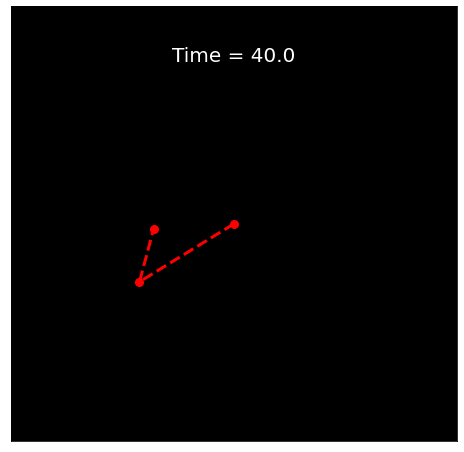

In [9]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    text.set_text("Time = " + str(round(t[i],2)))
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
text = plt.text(0, 3, 'sdfs' , fontsize = 20, color = 'white', ha = 'center')
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=len(t), interval=50)
ani.save('pen.gif',writer='pillow',fps=len(t[t<1]))